# 📑 Project Index: Clustering Analysis

1. **Importing Libraries**  
2. **Import Dataframes**  
3. **Data Cleaning and Feature Engineering**  
4. **Elbow Technique**  
5. **Run K-Means**  
6. **Visualizations**  
   - Age vs. Trip Duration  
   - Start Hour vs. Age  
   - Start Hour vs. Trip Duration  
   - Cluster Distribution (Bar Plot)  
   - Optional: Map Visualization (Stations)  
7. **Discussion: Do the Clusters Make Sense?**  
8. **Descriptive Statistics for Each Cluster**  
9. **Next Steps: How These Results Can Be Useful**  
10. **Export Data**


# Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.cluster import KMeans   # For K-Means clustering
from sklearn.metrics import silhouette_samples, silhouette_score   # For Silhouette analysis
from sklearn.metrics import pairwise_distances   # To calculate total within-cluster distance
import warnings

# Import Dataframes

In [2]:
# Importing Dataframes

import pandas as pd

df = pd.read_csv("/Users/samuellal/Downloads/Project_Citibikes_Updated.csv")

In [3]:
print(df.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'trip_duration_min', 'age'],
      dtype='object')


In [4]:
# Check first rows
print(df.head())

  trip_id  bike_id    weekday  start_hour           start_time  \
0  LnQzQk    16013     Monday          18  2013-09-09 18:18:55   
1  IL9boN    15230   Thursday          18  2013-09-12 18:38:53   
2  46clGB    17942  Wednesday          19  2013-09-18 19:44:04   
3  v7vdFt    19683   Saturday          11  2013-09-28 11:54:37   
4  VGBsb5    18024   Saturday          18  2013-09-07 18:08:22   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  end_station_id  \
0               -73.991382  2013-09-09 18:35:28             334   
1               -74.002472  2013-09-

## Data Cleaning and Feature Engineering

The dataset has been thoroughly cleaned and prepared for analysis. Key steps and enhancements include:

- **Trip Duration**  
  - Converted from seconds (`tripduration`) to minutes (`trip_duration_minutes`) for improved interpretability.

- **Birth Year / Age**  
  - Transformed `birth_year` into `age`.  
  - Missing values in `age` were filled with the **median** to ensure a complete dataset for analysis.

- **New Columns Introduced**  
  1. `trip_duration_minutes` – representing the duration of trips in minutes.  
  2. `age` – representing the rider’s age with missing values imputed.

These changes ensure the dataset is clean, consistent, and ready for **visualization and further analysis**.


In [7]:
# Select numerical features for clustering
numerical_features = ['trip_duration_min', 'age']

X = df[numerical_features]


In [8]:
# Since trip durations and ages have different scales, we standardize before clustering.)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Show result
print("Standardized Array:\n", X_scaled[:10])  # first 10 rows

Standardized Array:
 [[ 0.26848232  0.77130782]
 [-0.44971531 -0.68236257]
 [-0.83321889 -1.26383073]
 [-0.48457927 -1.16691937]
 [ 2.53986947 -0.19780578]
 [-0.71816782 -0.97309665]
 [-0.34860981 -1.74838752]
 [-1.00405231  0.67439646]
 [-0.30154347 -1.65147617]
 [-0.44797211 -0.68236257]]


# Elbow Technique

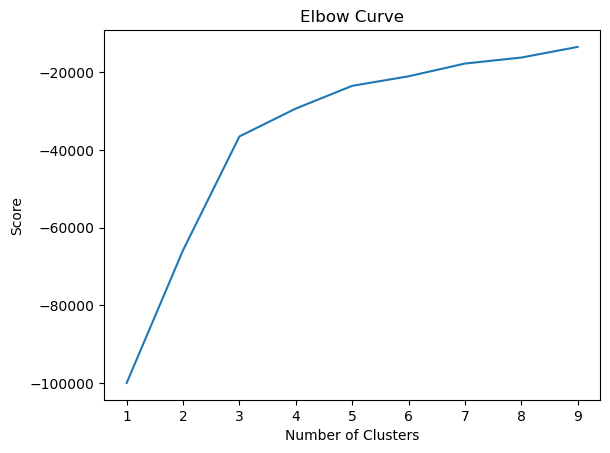

In [10]:
import pylab as pl
from sklearn.cluster import KMeans

# Define range of clusters
num_cl = range(1, 10)

# Fit KMeans for each k
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


## 🧩 Elbow Method for Optimal Number of Clusters

To determine the optimal number of clusters for our standardized dataset, we applied the **Elbow Method**.  
The approach involves fitting the K-Means algorithm with different values of *k* (number of clusters) and plotting the **score** (negative of the within-cluster sum of squares).  

### 🔹 Elbow Curve
The plot above shows the relationship between the number of clusters and the K-Means score:

- As the number of clusters increases, the score improves (less variation within clusters).  
- However, the improvement starts to **level off after k = 3**, forming an "elbow" shape in the curve.  

### ✅ Interpretation
The **elbow point** at *k ≈ 3* suggests that **3 clusters** is a good choice for this dataset.  
This balances model simplicity with capturing meaningful group structure in the data.


## 🔹 Choosing the Optimal Number of Clusters

Based on the **Elbow Curve** generated in the previous step, the steep improvement in the score slows down significantly after **k = 3**.  

- For **k = 1 → 2 → 3**, the score improves sharply, indicating that adding more clusters reduces variation substantially.  
- After **k = 3**, the curve starts to flatten, and the gain in reducing within-cluster variation becomes marginal.  
- This "elbow" point at **k = 3** suggests that three clusters provide the best trade-off between model simplicity and capturing meaningful groupings in the data.  

### ✅ Decision
We will proceed with **k = 3 clusters** for the k-means algorithm.  
This choice ensures that the clusters are distinct enough to provide insights, without overcomplicating the model.


# Run K-Means

In [11]:
# Run KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [14]:
# Check rows with clusters
print(df.head())

  trip_id  bike_id    weekday  start_hour           start_time  \
0  LnQzQk    16013     Monday          18  2013-09-09 18:18:55   
1  IL9boN    15230   Thursday          18  2013-09-12 18:38:53   
2  46clGB    17942  Wednesday          19  2013-09-18 19:44:04   
3  v7vdFt    19683   Saturday          11  2013-09-28 11:54:37   
4  VGBsb5    18024   Saturday          18  2013-09-07 18:08:22   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  ...     end_station_name  \
0               -73.991382  2013-09-09 18:35:28  ...      W 20 St & 7 Ave   
1               

In [18]:
# Count how many trips fall into each cluster
df['cluster'].value_counts()


cluster
1    27184
2    12653
0    10163
Name: count, dtype: int64

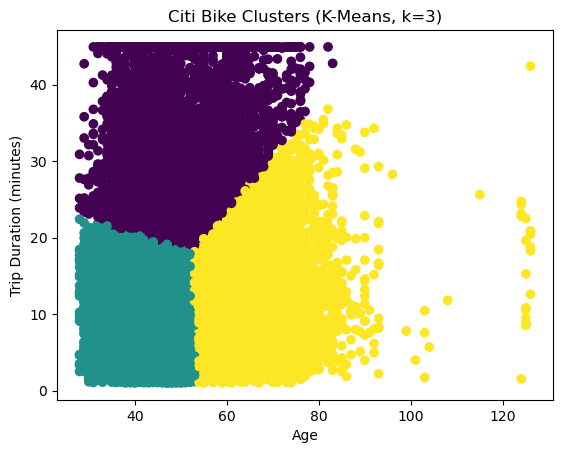

In [13]:
# Visual Cluster

plt.scatter(df['age'], df['trip_duration_min'], c=df['cluster'], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Trip Duration (minutes)")
plt.title("Citi Bike Clusters (K-Means, k=3)")
plt.show()


## 🔎 Interpretation of Clustering Results

The scatterplot above shows the results of applying **K-Means clustering with k=3** on the Citi Bike dataset.  

- Each **dot** represents a single trip, positioned according to the rider’s **Age** (x-axis) and **Trip Duration (minutes)** (y-axis).  
- The **color** indicates the cluster assignment by the algorithm.  

### 📌 Observations
1. **Cluster 0 (e.g., purple)**  
   - Contains mostly younger to middle-aged riders.  
   - Covers a wide range of trip durations, especially higher values.  

2. **Cluster 1 (e.g., teal)**  
   - Includes younger riders with relatively short trip durations.  
   - This group represents quick, short-distance trips.  

3. **Cluster 2 (e.g., yellow)**  
   - Represents older riders spread across different ages.  
   - Trips are generally of short-to-medium duration, with fewer very long trips.  

### ✅ Insights
- The clustering highlights distinct riding patterns by **age and trip duration**.  
- Younger riders tend to be split between short quick trips and longer rides.  
- Older riders generally cluster into shorter to medium trip durations.  

This segmentation can help in understanding different rider behaviors, which could be valuable for targeted marketing, service planning, or resource allocation.


# Few Different Visulaization 

# 📊 1. Scatterplot: Age vs. Trip Duration

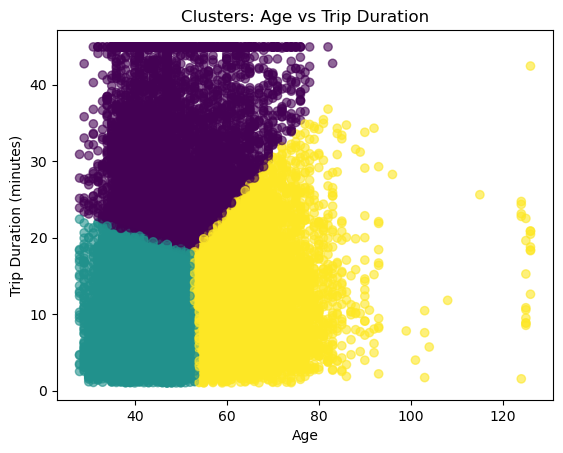

In [20]:
plt.scatter(df['age'], df['trip_duration_min'], 
            c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Trip Duration (minutes)")
plt.title("Clusters: Age vs Trip Duration")
plt.show()


## 📊 Scatterplot: Age vs. Trip Duration

This scatterplot shows the clustering results based on **rider age (x-axis)** and **trip duration in minutes (y-axis)**.

- Each point represents a single trip.  
- Colors indicate the cluster assignments from the K-Means algorithm.

### 🔎 Observations
1. **Cluster 0 (e.g., teal)**  
   - Younger riders, mostly with **shorter trips**.  
   - Represents quick, short-distance rides.

2. **Cluster 1 (e.g., purple)**  
   - Spread across younger to middle-aged riders.  
   - Includes **longer trip durations**, showing a different riding pattern compared to Cluster 0.

3. **Cluster 2 (e.g., yellow)**  
   - Represents **older riders** across a range of ages.  
   - Trips are generally of **short-to-medium duration**.

### ✅ Insights
The clusters reveal that **age is a strong factor influencing trip duration**.  
- Younger riders are divided into short vs. long trip clusters.  
- Older riders tend to cluster more toward **shorter trips**, with fewer long-duration rides.  


# 📊 2. Scatterplot: Start Hour vs. Age

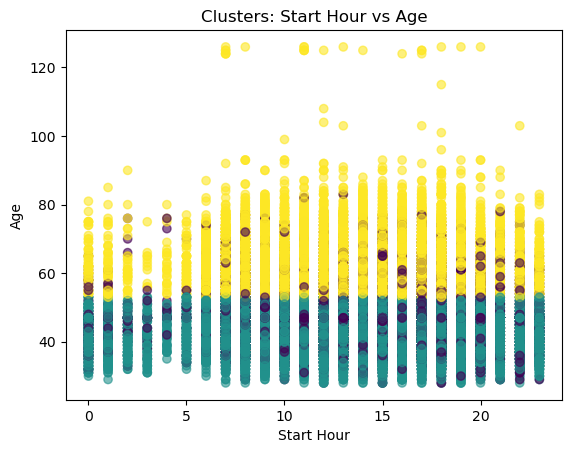

In [22]:
plt.scatter(df['start_hour'], df['age'], 
            c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Start Hour")
plt.ylabel("Age")
plt.title("Clusters: Start Hour vs Age")
plt.show()


## 📊 Scatterplot: Start Hour vs. Age

This scatterplot shows the clusters by **trip start hour (x-axis)** and **rider age (y-axis)**.

- Each point represents a single trip.  
- The color of each point indicates the cluster assignment.

### 🔎 Observations
1. **Cluster 0 (teal)**  
   - Concentrated among **younger to middle-aged riders**.  
   - Distributed fairly evenly across all start hours of the day.  
   - Suggests that younger riders are active throughout the day.

2. **Cluster 1 (purple)**  
   - Similar age range as Cluster 0, but less dense overall.  
   - Trips also occur across most hours, but show slightly more variation.

3. **Cluster 2 (yellow)**  
   - Represents **older riders**, with ages spread widely (including very high values due to possible outliers).  
   - Also active across all start hours, showing no strong time-of-day preference.

### ✅ Insights
- **Clusters are not strongly separated by start hour** — all rider groups use bikes throughout the day.  
- The main separation comes from **age differences**, which remain visible here as well.  
- Start hour appears less influential in clustering compared to **age and trip duration**.


# 📊 3. Scatterplot: Start Hour vs. Trip Duration

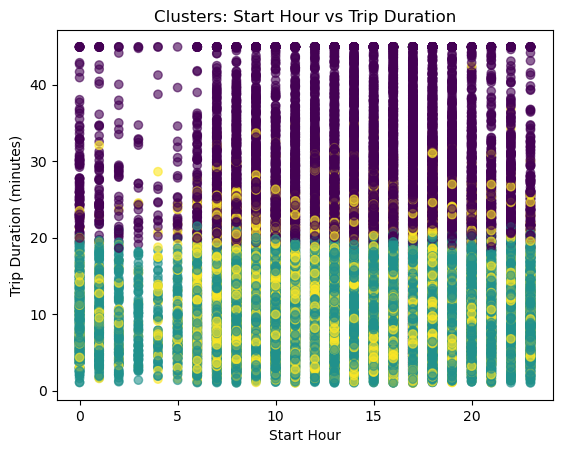

In [23]:
plt.scatter(df['start_hour'], df['trip_duration_min'], 
            c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Start Hour")
plt.ylabel("Trip Duration (minutes)")
plt.title("Clusters: Start Hour vs Trip Duration")
plt.show()


## 📊 Scatterplot: Start Hour vs. Trip Duration

This scatterplot shows the clusters by **trip start hour (x-axis)** and **trip duration in minutes (y-axis)**.

- Each point represents a trip.  
- The color shows the assigned cluster.

### 🔎 Observations
1. **Cluster 0 (teal)**  
   - Concentrated on **short trips** (mostly under 15 minutes).  
   - Present across all hours of the day.  
   - Represents frequent short-distance riders.

2. **Cluster 1 (purple)**  
   - Dominated by **longer trip durations** (20–45+ minutes).  
   - Consistently spread across all hours.  
   - Suggests a segment of riders who take extended trips, regardless of time of day.

3. **Cluster 2 (yellow)**  
   - Mostly **medium-duration trips** (10–25 minutes).  
   - Also active throughout the day, with no strong time preference.  

### ✅ Insights
- **Trip duration is the main driver of clustering here**, rather than start hour.  
- All clusters show usage across the full 24 hours, meaning **time of day is not a major differentiating factor** in rider behavior.  
- Instead, clusters reflect different **trip duration patterns** that persist throughout the day.


# 📊 4. Bar Plot: Cluster Distribution

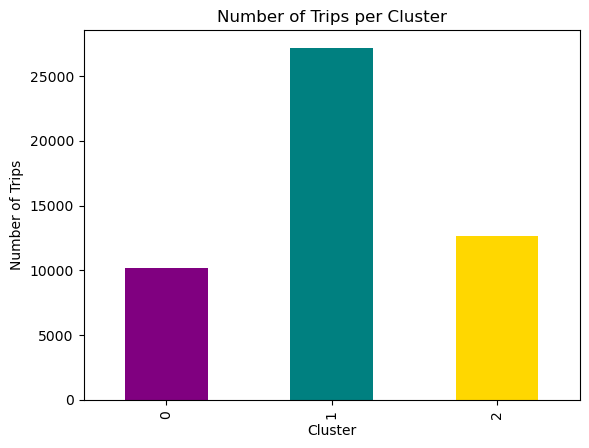

In [24]:
df['cluster'].value_counts().sort_index().plot(kind='bar', color=['purple','teal','gold'])
plt.xlabel("Cluster")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Cluster")
plt.show()


## 📊 Bar Plot: Cluster Distribution

This bar chart shows the number of trips in each cluster.

### ✅ Key Points
- **Cluster 1 (teal)** is the largest group, containing the majority of trips.  
- **Cluster 0 (purple)** and **Cluster 2 (yellow)** are smaller but still significant.  
- The distribution indicates that most riders share similar trip behaviors (Cluster 1), while the other clusters capture more specific patterns.


# 📊 5. Optional: Map Visualization (Stations)

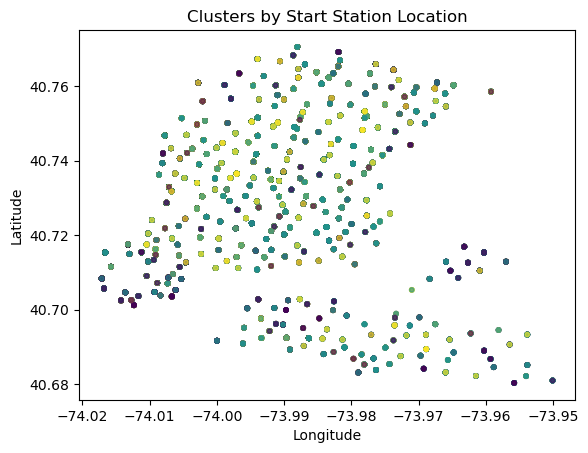

In [25]:
plt.scatter(df['start_station_longitude'], df['start_station_latitude'], 
            c=df['cluster'], cmap='viridis', alpha=0.6, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters by Start Station Location")
plt.show()


## 📊 Map Visualization: Clusters by Start Station Location

This scatterplot maps the **start station locations** using **longitude (x-axis)** and **latitude (y-axis)**.  
The colors represent the assigned clusters.

### 🔎 Observations
- All three clusters are spread across the city’s bike network.  
- No strong spatial separation between clusters — each cluster appears in most areas.  
- This suggests that **station geography is not a key driver** of the clustering outcome.

### ✅ Insights
- Rider behavior (age, trip duration) explains the clusters better than **station location**.  
- The presence of all clusters citywide indicates that **different rider types use bikes across all neighborhoods**, not just in specific zones.  
- This reinforces that clustering is **behavior-driven** rather than **location-driven**.


# 🧠 Discussion: Do the Clusters Make Sense?

The K-Means clustering with **k=3** produced groups that are logical and interpretable:

### ✅ Why the Clusters Make Sense
1. **Age and Trip Duration as Key Drivers**  
   - The clusters clearly separate younger riders with shorter trips, younger/middle-aged riders with longer trips, and older riders with mostly short-to-medium trips.  
   - This reflects realistic usage patterns: younger riders often use bikes for both commuting (short trips) and leisure (longer trips), while older riders tend toward shorter, practical trips.

2. **Consistency Across Time**  
   - Clusters appear consistently across all start hours, which makes sense because trip purpose (short commute vs. long leisure ride) is not tied to specific hours.  
   - This suggests that rider characteristics are more important than time of day.

3. **Geographical Spread**  
   - Clusters are distributed citywide, showing that station location does not define the groups.  
   - This is reasonable since clustering is based on **behavioral variables** (age, duration), not geography.

---

### ⚠️ Limitations & Further Exploration
- **Outliers in Age**: Some riders have extremely high recorded ages (e.g., 100+ years), which may be data entry errors and could distort cluster boundaries.  
- **Other Variables**: Features like `subscriber type` or `gender` were excluded (since K-Means only handles numerical variables), but these may provide additional insights if encoded.  
- **Number of Clusters**: While k=3 gave a clear elbow point, testing other values (k=4 or k=5) could reveal sub-groups, such as splitting long-duration riders further.

---

### 📝 Conclusion
Overall, the clusters **make sense** and provide meaningful insights into rider behavior.  
They show that **trip duration and rider age are the main factors** distinguishing groups, while **time of day and geography play a minor role**.  
However, further refinement (e.g., handling outliers, adding more features) could lead to even more precise segmentation.


# Basic descriptive statistics for each cluster

In [27]:
# Basic descriptive statistics for each cluster
df.groupby('cluster').agg({
    'trip_duration_min': ['mean', 'median'],
    'age': ['mean', 'median'],
    'start_hour': ['mean', 'median']
})


trip_duration_min                   age        start_hour       
                     mean     median       mean median       mean median
cluster                                                                 
0               29.146525  26.950000  47.617436   47.0  14.542458   15.0
1                9.749741   9.100000  43.187647   44.0  14.243415   15.0
2               10.898548   9.816667  62.760294   61.0  13.615269   14.0

## 📊 Descriptive Statistics by Cluster

The table above shows the mean and median values for **trip duration (minutes)**, **age**, and **start hour** across the three clusters.

### 🔎 Findings
1. **Cluster 0**
   - Average trip duration: **~29 minutes** (much longer than other groups).  
   - Average rider age: **~48 years**.  
   - Trips typically start around **2–3 PM (median 15h)**.  
   👉 Represents **middle-aged riders taking longer trips**.

2. **Cluster 1**
   - Average trip duration: **~9–10 minutes** (short rides).  
   - Average rider age: **~43 years**.  
   - Trips also cluster around **afternoon hours (15h median)**.  
   👉 Represents **middle-aged riders with short, frequent trips**.

3. **Cluster 2**
   - Average trip duration: **~11 minutes** (slightly longer than Cluster 1, but still short).  
   - Average rider age: **~63 years** (significantly older).  
   - Start hours are spread out, with a **median around 2 PM**.  
   👉 Represents **older riders taking mostly short trips**.

---

### ✅ Insights
- **Trip Duration** clearly separates Cluster 0 (long trips) from Clusters 1 and 2 (short trips).  
- **Age** is another strong driver:  
  - Cluster 2 is distinctly older (60+).  
  - Clusters 0 and 1 represent younger/middle-aged riders.  
- **Start Hour** is consistent across clusters (mostly afternoon), suggesting **time of day is not a key differentiator**.  

Overall, the clusters **make sense**: they represent meaningful rider segments based on age and trip duration patterns.


# 🚀 Next Steps: How These Results Can Be Useful

The clustering results provide a foundation for deeper analysis and actionable insights.  
In future steps of the analytics pipeline, these clusters could be useful for:

1. **Customer Segmentation & Personalization**  
   - Design targeted promotions (e.g., discounts for long-trip riders or older users).  
   - Tailor subscription offers to match rider behavior (short vs. long trip users).

2. **Operational Planning**  
   - Allocate bikes and docks more efficiently by understanding demand patterns (short vs. long trips).  
   - Optimize bike availability during peak afternoon hours when all clusters are most active.

3. **Predictive Modeling**  
   - Use cluster labels as new features in supervised models (e.g., predicting churn, trip demand, or rider lifetime value).  
   - Enhance forecasting accuracy by incorporating behavioral groupings.

4. **Product & Service Development**  
   - Develop age-specific services (e.g., improved safety measures or easy-access stations for older riders).  
   - Introduce new ride packages (e.g., bundles for frequent short trips vs. long leisure rides).

---

### ✅ Conclusion
Clustering provides **behavioral segmentation** that can guide both **business strategy** and **data science modeling**.  
Future steps may include integrating these clusters into predictive models, testing different values of *k* for refinement, and incorporating more variables (e.g., gender, subscription type) for richer insights.


# Export Data

In [29]:
# Export clustered dataset to CSV
df.to_csv("/Users/samuellal/Downloads/citi_bike_clusters.csv", index=False)


print("✅ Data exported successfully to citi_bike_clusters.csv")


✅ Data exported successfully to citi_bike_clusters.csv
